In [157]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as plt

from sklearn.preprocessing import StandardScaler


In [158]:
class LogisticRegression():
    def __init__(self, alpha=0.01, iterations=1000):
        self.iterations = iterations
        self.alpha = alpha
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def logLoss(self, y, yhat):
        return -(y * np.log(yhat)) - ((1 - y) * np.log(1 - yhat))


    def compute_cost(self, y, yhat):
        m = len(y)
        cost = np.sum(self.logLoss(y, yhat)) / m
        return cost
    
    def gradientDescent(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        for i in range(self.iterations):
            z = np.dot(X, self.w) + self.b
            yhat = self.sigmoid(z)
            
            dw = (1 / m) * np.dot(X.T, (yhat - y))
            db = (1 / m) * np.sum(yhat - y)
            
            # Update weights and bias
            self.w -= self.alpha * dw
            self.b -= self.alpha * db
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        yhat = self.sigmoid(z)
        pred_class = [1 if p >= 0.50 else 0 for p in yhat]
        return np.array(pred_class)
    
    def accuracy(self, y, yhat):
        correct_predictions = np.sum(y == yhat)
        accuracy = correct_predictions / len(y)
        return accuracy  

In [120]:
df = pd.read_csv('./diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
n = len(df)
print(f'# samples: {n}')

# samples: 768


In [122]:
# Basic Statistics
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [123]:
print(df.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

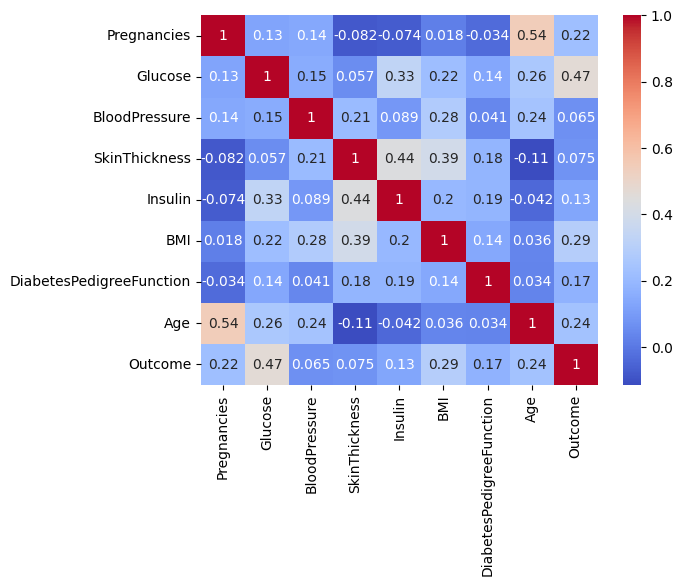

In [124]:
# Visualizations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [125]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [126]:
print("Number of 0's for Glucose:", df['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", df['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", df['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", df['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", df['BMI'].isin([0]).sum())

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


In [127]:
glucose = (df['Glucose'].isin([0]).sum() / n) * 100
print("Percentage of missing data for Glucose: %.2f" % glucose)

bloodpressure = (df['BloodPressure'].isin([0]).sum() / n) * 100
print("Percentage of missing data for Blood Pressure: %.2f" % bloodpressure)

skinthickness = (df['SkinThickness'].isin([0]).sum() / n) * 100
print("Percentage of missing data for Skin Thickness: %.2f" % skinthickness)

insulin = (df['Insulin'].isin([0]).sum() / n) * 100
print("Percentage of missing data for Insulin: %.2f" % insulin)

bmi = (df['BMI'].isin([0]).sum() / n) * 100
print("Percentage of missing data for BMI: %.2f" % bmi)


Percentage of missing data for Glucose: 0.65
Percentage of missing data for Blood Pressure: 4.56
Percentage of missing data for Skin Thickness: 29.56
Percentage of missing data for Insulin: 48.70
Percentage of missing data for BMI: 1.43


In [128]:
df_clean = df.copy()
df_clean = df_clean.infer_objects()

In [129]:
# Fill missing values with mean for continuous columns
df_clean['Glucose'] = df_clean['Glucose'].replace(0, pd.NA)
df_clean['Glucose'] = df_clean['Glucose'].fillna(df_clean['Glucose'].mean())

df_clean['BloodPressure'] = df_clean['BloodPressure'].replace(0, pd.NA)
df_clean['BloodPressure'] = df_clean['BloodPressure'].fillna(df_clean['BloodPressure'].mean())

df_clean['BMI'] = df_clean['BMI'].replace(0, pd.NA)
df_clean['BMI'] = df_clean['BMI'].fillna(df_clean['BMI'].mean())

df_clean['SkinThickness'] = df_clean['SkinThickness'].replace(0, pd.NA)
df_clean['SkinThickness'] = df_clean['SkinThickness'].fillna(df_clean['SkinThickness'].median())

df_clean['Insulin'] = df_clean['Insulin'].replace(0, pd.NA)
df_clean['Insulin'] = df_clean['Insulin'].fillna(df_clean['Insulin'].median())

C:\Users\premd\AppData\Local\Temp\ipykernel_22292\2449350008.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Glucose'] = df_clean['Glucose'].fillna(df_clean['Glucose'].mean())
C:\Users\premd\AppData\Local\Temp\ipykernel_22292\2449350008.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['BloodPressure'] = df_clean['BloodPressure'].fillna(df_clean['BloodPressure'].mean())
C:\Users\premd\AppData\Local\Temp\ipykernel_22292\2449350008.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

In [133]:
print("\nOutput Label (y):")
print(y)


Output Label (y):
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

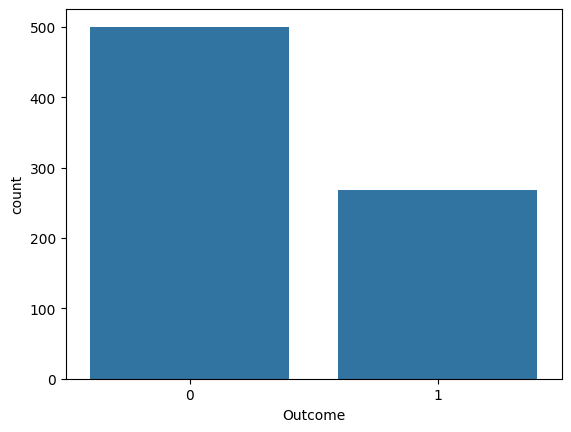

In [137]:
sns.countplot(x='Outcome', data=df_clean)

<Axes: xlabel='Age', ylabel='Count'>

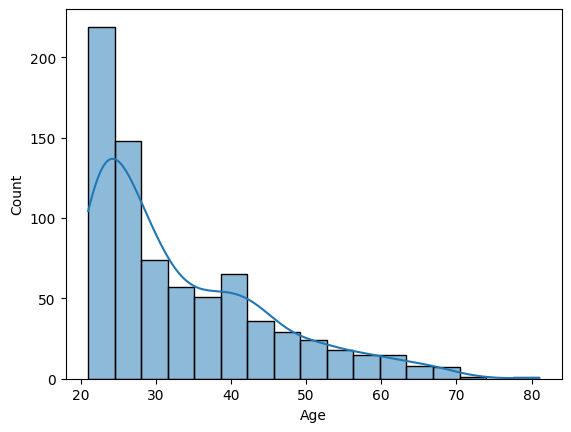

In [139]:
sns.histplot(df_clean['Age'].dropna(), kde=True)

<Axes: xlabel='Age', ylabel='Density'>

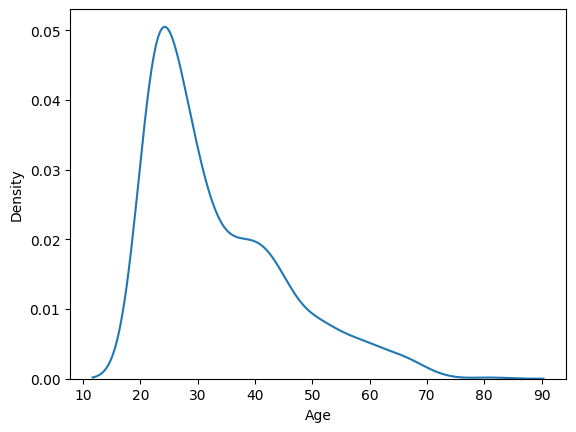

In [140]:
sns.kdeplot(df_clean['Age'].dropna())

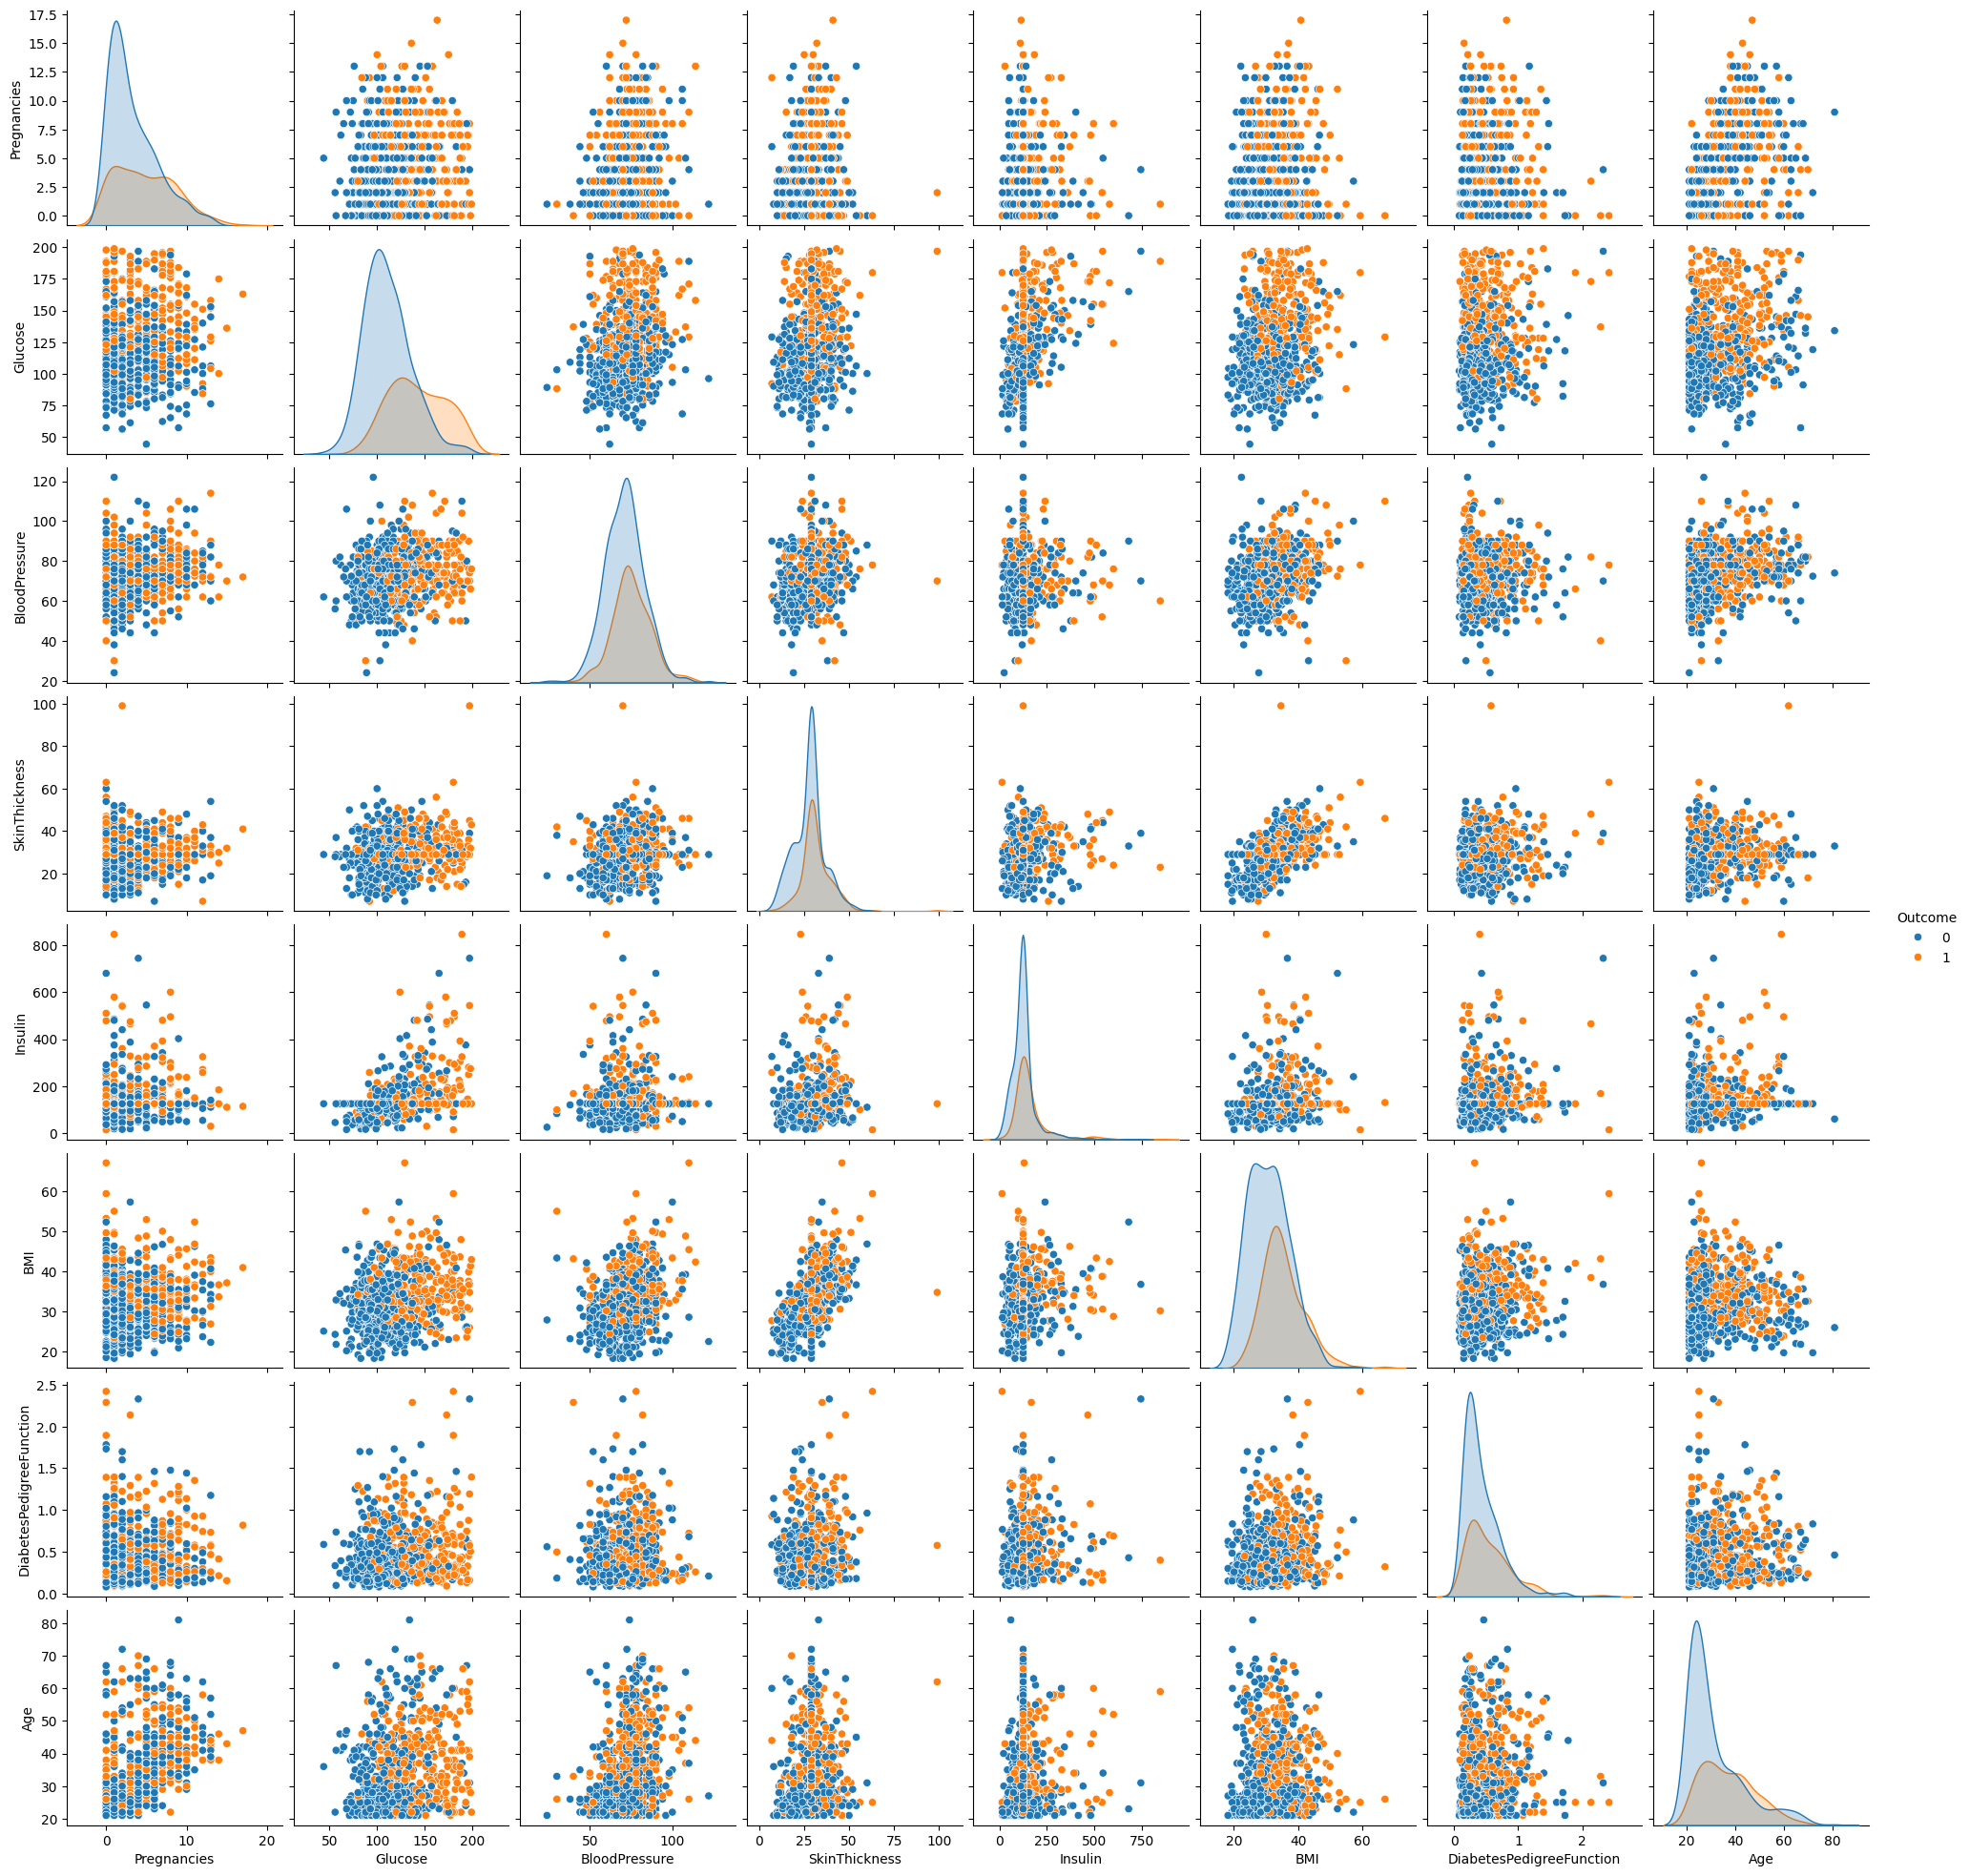

In [141]:
sns.pairplot(data=df_clean, diag_kind='kde', hue='Outcome')

In [149]:
# Handling outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [152]:
# Normalizing/Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [153]:
# Splitting features and labels
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Labels
print(X)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0              6  0.991351      -0.010626       0.941847 -0.829247  0.247974   
1              1 -1.170674      -0.539736       0.550406 -0.829247 -0.840853   
2              8  2.192476      -0.716106      -1.341558 -0.829247 -1.354158   
3              1 -1.033403      -0.539736       0.158965  0.353035 -0.607533   
5              5 -0.106820       0.165744      -1.341558 -0.829247 -0.996400   
..           ...       ...            ...            ...       ...       ...   
763           10 -0.621588       0.342113       1.789969  1.434699  0.139091   
764            2  0.099087      -0.186996       0.419926 -0.829247  0.745724   
765            5  0.064769      -0.010626       0.158965  0.579430 -0.903072   
766            1  0.236358      -1.068846      -1.341558 -0.829247 -0.296440   
767            1 -0.896131      -0.186996       0.680887 -0.829247 -0.249776   

     DiabetesPedigreeFunction       Age

In [ ]:
print("Input Features (X):")
X

In [156]:
model = LogisticRegression()
model.gradientDescent(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate accuracy
acc = model.accuracy(y, y_pred)

# Print resultsprint("Weights:", model.w)
print("Bias:", model.b)
print("Predictions:", y_pred)
print("Accuracy:", acc)

Bias: -0.6586600058265406
Predictions: [1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 